In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
# Load the dataset
df = pd.read_csv('auto-mpg.csv')
print(df.head())
# Clean the dataset
df = df.dropna()
df = df.drop(columns=['car name'], errors='ignore')  # Adjust if necessary
# Split features and target
X = df.drop('mpg', axis=1)
y = df['mpg']
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")


   Unnamed: 0   mpg  cylinders  displacement  horsepower  weight  \
0           0  18.0        8.0         307.0       130.0  3504.0   
1           1  15.0        8.0         350.0       165.0  3693.0   
2           2  18.0        8.0         318.0       150.0  3436.0   
3           3  16.0        8.0         304.0       150.0  3433.0   
4           4  17.0        8.0         302.0       140.0  3449.0   

   acceleration  model year  origin  
0          12.0        70.0     1.0  
1          11.5        70.0     1.0  
2          11.0        70.0     1.0  
3          12.0        70.0     1.0  
4          10.5        70.0     1.0  
X_train shape: torch.Size([318, 8]), y_train shape: torch.Size([318, 1])


In [2]:
import torch.nn as nn

# 2-Layer Neural Network
class NeuralNet2L(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, activation_fn):
        super(NeuralNet2L, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = activation_fn
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.fc2(out)
        return out

# 3-Layer Neural Network
class NeuralNet3L(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, activation_fn):
        super(NeuralNet3L, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = activation_fn
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.fc2(out)
        out = self.activation(out)
        out = self.fc3(out)
        return out

# XL Neural Network
class NeuralNetXL(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, activation_fn):
        super(NeuralNetXL, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = activation_fn
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.fc2(out)
        out = self.activation(out)
        out = self.fc3(out)
        out = self.activation(out)
        out = self.fc4(out)
        return out


In [3]:
# Define activation functions
activation_functions = {
    'ReLU': nn.ReLU(),
    'Tanh': nn.Tanh(),
    'Sigmoid': nn.Sigmoid(),
    'LeakyReLU': nn.LeakyReLU(),
    'ELU': nn.ELU(),
    'SELU': nn.SELU(),
    'GELU': nn.GELU(),
    'Softplus': nn.Softplus(),
    'Softsign': nn.Softsign()
}
# Define optimizers
optimizer_list = ['SGD', 'Adam', 'RMSprop', 'NAdam']
default_learning_rates = {
    'SGD': 0.001,
    'Adam': 0.001,
    'RMSprop': 0.001,
    'NAdam': 0.001
}


In [4]:
def get_optimizer_and_scheduler(optimizer_name, model_parameters):
    lr = default_learning_rates[optimizer_name]
    if optimizer_name == 'SGD':
        optimizer = optim.SGD(model_parameters, lr=lr, momentum=0.9)
    elif optimizer_name == 'Adam':
        optimizer = optim.Adam(model_parameters, lr=lr)
    elif optimizer_name == 'RMSprop':
        optimizer = optim.RMSprop(model_parameters, lr=lr)
    elif optimizer_name == 'NAdam':
        optimizer = optim.NAdam(model_parameters, lr=lr)
    else:
        raise ValueError(f"Optimizer {optimizer_name} not recognized.")
    # Define a scheduler
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)
    return optimizer, scheduler


In [5]:
from sklearn.metrics import mean_squared_error, r2_score
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# Define the loss function
criterion = nn.MSELoss()
def check_for_nans(tensor, tensor_name):
    has_nan = torch.isnan(tensor).any()
    has_inf = torch.isinf(tensor).any()
    print(f"{tensor_name} contains NaN: {has_nan}, contains Inf: {has_inf}")
check_for_nans(X_train, "X_train")
check_for_nans(y_train, "y_train")
check_for_nans(X_test, "X_test")
check_for_nans(y_test, "y_test")


X_train contains NaN: False, contains Inf: False
y_train contains NaN: False, contains Inf: False
X_test contains NaN: False, contains Inf: False
y_test contains NaN: False, contains Inf: False


In [6]:

def train_model(model, criterion, optimizer, scheduler, train_loader, num_epochs=100):
            model.train()
            for epoch in range(num_epochs):
                epoch_loss = 0.0
                for inputs, targets in train_loader:
                    outputs = model(inputs)
                    loss = criterion(outputs, targets)
                    if torch.isnan(loss):
                        print(f"NaN loss encountered at epoch {epoch+1}")
                        return model
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                    epoch_loss += loss.item()
                scheduler.step()
                avg_loss = epoch_loss / len(train_loader)
                if (epoch+1)==100:
                    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.6f}")
            return model


In [7]:
def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        predictions = model(X_test)   
        # Convert tensors to numpy arrays
        y_pred = predictions.cpu().numpy()
        y_true = y_test.cpu().numpy()    
        # Check for NaNs in predictions and true labels
        if np.isnan(y_pred).any():
            print("NaNs detected in model predictions.")
            return np.nan, np.nan, np.nan, np.nan, None, None
        if np.isnan(y_true).any():
            print("NaNs detected in true labels.")
            return np.nan, np.nan, np.nan, np.nan, None, None     
        # Calculate metrics
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_true, y_pred)
        sse = np.sum((y_true - y_pred) ** 2)  
    return mse, rmse, r2, sse, y_true, y_pred  # Return y_true and y_pred for plotting


In [8]:
from sklearn.model_selection import KFold
# Define 5-fold cross-validation with shuffling and a fixed random state for reproducibility
kf = KFold(n_splits=5, shuffle=True, random_state=42)
#function to evaluate the model with 5-fold cross-validation
def cross_val_evaluate(model, X, y, criterion, optimizer_name, activation_name):
    mse_scores = []   # To store MSE for each fold
    rmse_scores = []  # To store RMSE for each fold
    r2_scores = []    # To store R² for each fold
    y_true_all = []   # To store true values across folds for plotting
    y_pred_all = []   # To store predicted values across folds for plotting
    print("5-fold cross-validation evaluation")
    # Loop through each folda
    for train_index, val_index in kf.split(X):
        # Split the data into training and validation sets for the current fold
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]    
        # Initialize model, optimizer, and scheduler for the fold
        model_fold = model  # Re-initialize model for each fold
        optimizer, scheduler = get_optimizer_and_scheduler(optimizer_name, model_fold.parameters())
        # Train the model on the current fold
        model_fold = train_model(model_fold, criterion, optimizer, scheduler, train_loader, num_epochs=100)   
        # Evaluate the model on the validation fold
        mse, rmse, r2, _, y_true_fold, y_pred_fold = evaluate_model(model_fold, X_val_fold, y_val_fold)
        mse_scores.append(mse)  # Save MSE for this fold
        rmse_scores.append(rmse)  # Save RMSE for this fold
        r2_scores.append(r2)  # Save R² for this fold 
        # Append true and predicted values for each fold for plotting
        y_true_all.extend(y_true_fold)
        y_pred_all.extend(y_pred_fold)
      # Calculate average metrics across all folds
    avg_mse = np.mean(mse_scores)
    avg_rmse = np.mean(rmse_scores)
    avg_r2 = np.mean(r2_scores)
    
    return avg_mse, avg_rmse, avg_r2, np.array(y_true_all), np.array(y_pred_all)  # Return average metrics and all true/predicted values


In [10]:
num_epochs = 100  
model_metrics = {}
for activation_name, activation_fn in activation_functions.items():
    for optimizer_name in optimizer_list:
        print(f"Testing Activation: {activation_name}, Optimizer: {optimizer_name}")
        input_size_2L = 8     # Based on 8 features
        hidden_size_2L = 128    # Smaller hidden layer
        output_size_2L = 1     # Predicting a single value (mpg)
        # 3-Layer Neural Network (moderate complexity)a
        input_size_3L = 8   # Same input size
        hidden_size_3L = 128  # Larger hidden layer
        output_size_3L = 1     # Predicting a single value (mpg)
        # XL Model (complex model with more layers or larger hidden size)
        input_size_XL = 8      # Same input size
        hidden_size_XL = 128   # Even larger hidden layer
        output_size_XL = 1     # Predicting a single value (mpg)
        # Define model configurations
        model_2L = NeuralNet2L(input_size_2L, hidden_size_2L, output_size_2L, activation_fn)
        model_3L = NeuralNet3L(input_size_3L, hidden_size_3L, output_size_3L, activation_fn)
        model_XL = NeuralNetXL(input_size_XL, hidden_size_XL, output_size_XL, activation_fn)  
        # Get optimizer and scheduler for each model
        optimizer_2L, scheduler_2L = get_optimizer_and_scheduler(optimizer_name, model_2L.parameters())
        optimizer_3L, scheduler_3L = get_optimizer_and_scheduler(optimizer_name, model_3L.parameters())
        optimizer_XL, scheduler_XL = get_optimizer_and_scheduler(optimizer_name, model_XL.parameters())  
        # Train models
        print("training 2L net")
        model_2L = train_model(model_2L, criterion, optimizer_2L, scheduler_2L, train_loader)
        print("training 3l net")
        model_3L = train_model(model_3L, criterion, optimizer_3L, scheduler_3L, train_loader)
        print("training Xl net")
        model_XL = train_model(model_XL, criterion, optimizer_XL, scheduler_XL, train_loader)
        # Evaluate models
        print("starting evaluation")
        train_mse_2L, train_rmse_2L, train_r2_2L, train_sse_2L, y_true_train_2L, y_pred_train_2L = evaluate_model(model_2L, X_train, y_train)
        test_mse_2L, test_rmse_2L, test_r2_2L, test_sse_2L, y_true_test_2L, y_pred_test_2L = evaluate_model(model_2L, X_test, y_test)        
        train_mse_3L, train_rmse_3L, train_r2_3L, train_sse_3L, y_true_train_3L, y_pred_train_3L = evaluate_model(model_3L, X_train, y_train)
        test_mse_3L, test_rmse_3L, test_r2_3L, test_sse_3L, y_true_test_3L, y_pred_test_3L = evaluate_model(model_3L, X_test, y_test)       
        train_mse_XL, train_rmse_XL, train_r2_XL, train_sse_XL, y_true_train_XL, y_pred_train_XL = evaluate_model(model_XL, X_train, y_train)
        test_mse_XL, test_rmse_XL, test_r2_XL, test_sse_XL, y_true_test_XL, y_pred_test_XL = evaluate_model(model_XL, X_test, y_test)
        # Cross-validation results
        print("cross validation of 2L net")
        cv_mse_2L, cv_rmse_2L, cv_r2_2L,y_true_cv_2L,y_true_train_cv_2L = cross_val_evaluate(model_2L, X_train, y_train, criterion, optimizer_name, activation_name)
        print("cross validation of 3L net")
        cv_mse_3L, cv_rmse_3L, cv_r2_3L,y_true_cv_3L,y_true_train_cv_3L = cross_val_evaluate(model_3L, X_train, y_train, criterion, optimizer_name, activation_name)
        print("cross validation of XL net")
        cv_mse_XL, cv_rmse_XL, cv_r2_XL,y_true_cv_XL,y_true_train_cv_XL = cross_val_evaluate(model_XL, X_train, y_train, criterion, optimizer_name, activation_name)
        # Store metrics and predictions in model_metrics
        key = f'Activation: {activation_name}, Optimizer: {optimizer_name}'
        model_metrics[key] = {
            '2-Layer Neural Network': {
                'In-Sample MSE': train_mse_2L, 'In-Sample RMSE': train_rmse_2L, 'In-Sample R²': train_r2_2L,
                'Validation MSE': test_mse_2L, 'Validation RMSE': test_rmse_2L, 'Validation R²': test_r2_2L,
                'Cross-Validation MSE': cv_mse_2L, 'Cross-Validation RMSE': cv_rmse_2L, 'Cross-Validation R²': cv_r2_2L,
                'y_true_train': y_true_train_2L, 'y_pred_train': y_pred_train_2L,
                'y_true_test': y_true_test_2L, 'y_pred_test': y_pred_test_2L
            },
            '3-Layer Neural Network': {
                'In-Sample MSE': train_mse_3L, 'In-Sample RMSE': train_rmse_3L, 'In-Sample R²': train_r2_3L,
                'Validation MSE': test_mse_3L, 'Validation RMSE': test_rmse_3L, 'Validation R²': test_r2_3L,
                'Cross-Validation MSE': cv_mse_3L, 'Cross-Validation RMSE': cv_rmse_3L, 'Cross-Validation R²': cv_r2_3L,
                'y_true_train': y_true_train_3L, 'y_pred_train': y_pred_train_3L,
                'y_true_test': y_true_test_3L, 'y_pred_test': y_pred_test_3L
            },
            'XL Neural Network': {
                'In-Sample MSE': train_mse_XL, 'In-Sample RMSE': train_rmse_XL, 'In-Sample R²': train_r2_XL,
                'Validation MSE': test_mse_XL, 'Validation RMSE': test_rmse_XL, 'Validation R²': test_r2_XL,
                'Cross-Validation MSE': cv_mse_XL, 'Cross-Validation RMSE': cv_rmse_XL, 'Cross-Validation R²': cv_r2_XL,
                'y_true_train': y_true_train_XL, 'y_pred_train': y_pred_train_XL,
                'y_true_test': y_true_test_XL, 'y_pred_test': y_pred_test_XL
            }
        }

Testing Activation: ReLU, Optimizer: SGD
training 2L net
Epoch [100/100], Loss: 6.231747
training 3l net
Epoch [100/100], Loss: 5.104767
training Xl net
Epoch [100/100], Loss: 3.467718
starting evaluation
cross validation of 2L net
5-fold cross-validation evaluation
Epoch [100/100], Loss: 5.666179
Epoch [100/100], Loss: 5.091879
Epoch [100/100], Loss: 4.640045
Epoch [100/100], Loss: 4.275718
Epoch [100/100], Loss: 4.008057
cross validation of 3L net
5-fold cross-validation evaluation
Epoch [100/100], Loss: 3.874587
Epoch [100/100], Loss: 3.002533
Epoch [100/100], Loss: 2.314301
Epoch [100/100], Loss: 1.900708
Epoch [100/100], Loss: 1.578532
cross validation of XL net
5-fold cross-validation evaluation
Epoch [100/100], Loss: 2.015366
Epoch [100/100], Loss: 1.341067
Epoch [100/100], Loss: 1.007442
Epoch [100/100], Loss: 0.782131
Epoch [100/100], Loss: 0.623834
Testing Activation: ReLU, Optimizer: Adam
training 2L net
Epoch [100/100], Loss: 14.084029
training 3l net
Epoch [100/100], Loss:

In [57]:
print("\nModel Performance Comparison:")
for model_name, metrics in model_metrics.items():
    print(f"\n{model_name}:")
    for metric_name, metric_value in metrics.items():
        # Skip specific metrics by name
        if metric_name in ['y_true', 'y_pred_test']:
            continue
        if isinstance(metric_value, dict):
            print(f"  {metric_name}:")
            for sub_metric_name, sub_metric_value in metric_value.items():
                # Skip specific sub-metrics by name
                if sub_metric_name in ['y_true_train', 'y_pred_test','y_true_test','y_pred_train']:
                    continue
                if isinstance(sub_metric_value, float):
                    print(f"    {sub_metric_name}: {sub_metric_value:.4f}")
                else:
                    print(f"    {sub_metric_name}: {sub_metric_value}")
        elif isinstance(metric_value, float):
            print(f"  {metric_name}: {metric_value:.4f}")
        else:
            print(f"  {metric_name}: {metric_value}")



Model Performance Comparison:

Activation: ReLU, Optimizer: SGD:
  2-Layer Neural Network:
    In-Sample MSE: 6.228287220001221
    In-Sample RMSE: 2.4956536293029785
    In-Sample R²: 0.9007
    Validation MSE: 4.691629886627197
    Validation RMSE: 2.1660170555114746
    Validation R²: 0.9127
    Cross-Validation MSE: 4.550671100616455
    Cross-Validation RMSE: 2.104764461517334
    Cross-Validation R²: 0.9272
  3-Layer Neural Network:
    In-Sample MSE: 4.596055507659912
    In-Sample RMSE: 2.14384126663208
    In-Sample R²: 0.9267
    Validation MSE: 4.497878074645996
    Validation RMSE: 2.1208200454711914
    Validation R²: 0.9163
    Cross-Validation MSE: 2.6371114253997803
    Cross-Validation RMSE: 1.5687296390533447
    Cross-Validation R²: 0.9582
  XL Neural Network:
    In-Sample MSE: 3.4783802032470703
    In-Sample RMSE: 1.8650416135787964
    In-Sample R²: 0.9445
    Validation MSE: 5.398648738861084
    Validation RMSE: 2.3234992027282715
    Validation R²: 0.8996
   

In [11]:
# Initialize a dictionary to store the best performance and details for each network type
best_performance = {
    '2-Layer Neural Network': {'R²': -float('inf'), 'Details': None},
    '3-Layer Neural Network': {'R²': -float('inf'), 'Details': None},
    'XL Neural Network': {'R²': -float('inf'), 'Details': None}
}

# Iterate through each configuration and model to find the best R² based on all metrics
for config, model_data in model_metrics.items():
    for model_name, metrics in model_data.items():
        # Extract the three R² metrics
        validation_r2 = metrics.get('Validation R²', -float('inf'))
        insample_r2 = metrics.get('In-Sample R²', -float('inf'))
        cross_val_r2 = metrics.get('Cross-Validation R²', -float('inf'))
        
        # Find the highest R² among the three for the current configuration
        best_r2 = max(validation_r2, insample_r2, cross_val_r2)
        
        # Check if this is the best R² score for the current model type
        if best_r2 > best_performance[model_name]['R²']:
            best_performance[model_name]['R²'] = best_r2
            best_performance[model_name]['Details'] = {
                'Activation and Optimizer': config,
                'Best Metric': 'Validation R²' if best_r2 == validation_r2 else 'In-Sample R²' if best_r2 == insample_r2 else 'Cross-Validation R²',
                'Metrics': metrics
            }

# Print the best performance for each network type
print("\nBest Performance for Each Neural Network Layer:")
for model_name, performance in best_performance.items():
    print(f"\n{model_name}:")
    print(f"  Best R²: {performance['R²']:.4f}")
    print(f"  Best Metric: {performance['Details']['Best Metric']}")
    print(f"  Activation and Optimizer: {performance['Details']['Activation and Optimizer']}")
    print("  Metrics:")
    for metric_name, metric_value in performance['Details']['Metrics'].items():

        if isinstance(metric_value, dict):
            print(f"    {metric_name}:")
            for sub_metric_name, sub_metric_value in metric_value.items():
                # Skip specific sub-metrics by name
                if sub_metric_name in ['y_true_train', 'y_pred_test', 'y_true_test', 'y_pred_train']:
                    continue
                if isinstance(sub_metric_value, float):
                    print(f"      {sub_metric_name}: {sub_metric_value:.4f}")
                else:
                    print(f"      {sub_metric_name}: {sub_metric_value}")
        elif isinstance(metric_value, float):
            print(f"    {metric_name}: {metric_value:.4f}")
        else:
            print(f"    {metric_name}: {metric_value}")



Best Performance for Each Neural Network Layer:

2-Layer Neural Network:
  Best R²: 0.9277
  Best Metric: Cross-Validation R²
  Activation and Optimizer: Activation: Tanh, Optimizer: SGD
  Metrics:
    In-Sample MSE: 6.1132707595825195
    In-Sample RMSE: 2.4725029468536377
    In-Sample R²: 0.9025
    Validation MSE: 4.470783233642578
    Validation RMSE: 2.114422559738159
    Validation R²: 0.9168
    Cross-Validation MSE: 4.506539821624756
    Cross-Validation RMSE: 2.0948846340179443
    Cross-Validation R²: 0.9277
    y_true_train: [[16. ]
 [27. ]
 [37. ]
 [36.1]
 [23. ]
 [14. ]
 [32.8]
 [29.9]
 [20. ]
 [12. ]
 [15.5]
 [23.7]
 [24. ]
 [36. ]
 [19. ]
 [38. ]
 [29. ]
 [21.5]
 [27.9]
 [14. ]
 [36.1]
 [22. ]
 [18. ]
 [17. ]
 [18. ]
 [14. ]
 [26. ]
 [13. ]
 [33. ]
 [37. ]
 [32. ]
 [28. ]
 [19.2]
 [32. ]
 [27.4]
 [20. ]
 [26. ]
 [20.6]
 [37.3]
 [16.2]
 [15. ]
 [21. ]
 [21. ]
 [20.5]
 [21. ]
 [25.4]
 [34.1]
 [27. ]
 [36. ]
 [31.6]
 [38.1]
 [32. ]
 [40.8]
 [19. ]
 [20. ]
 [22. ]
 [17.5]


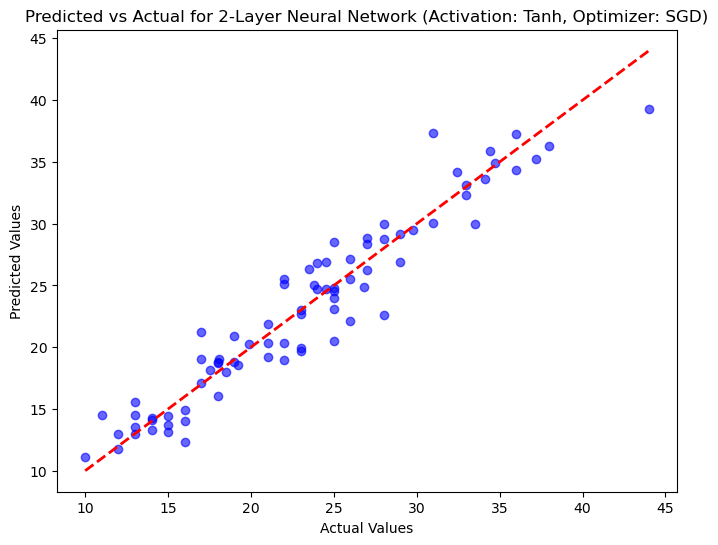

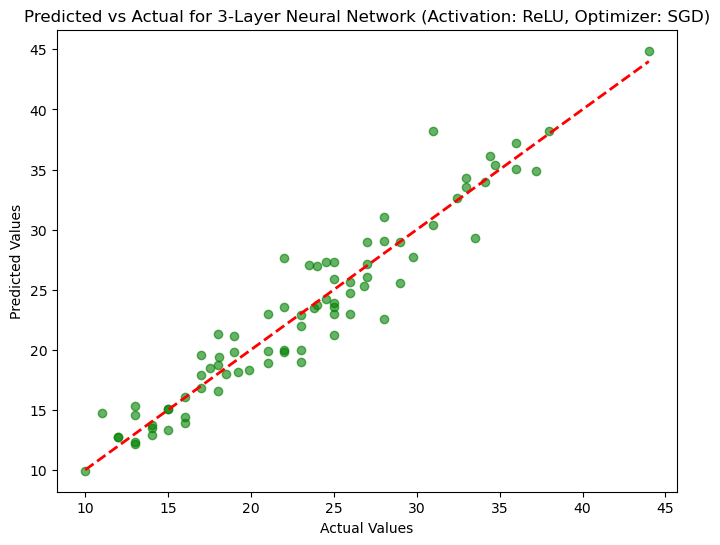

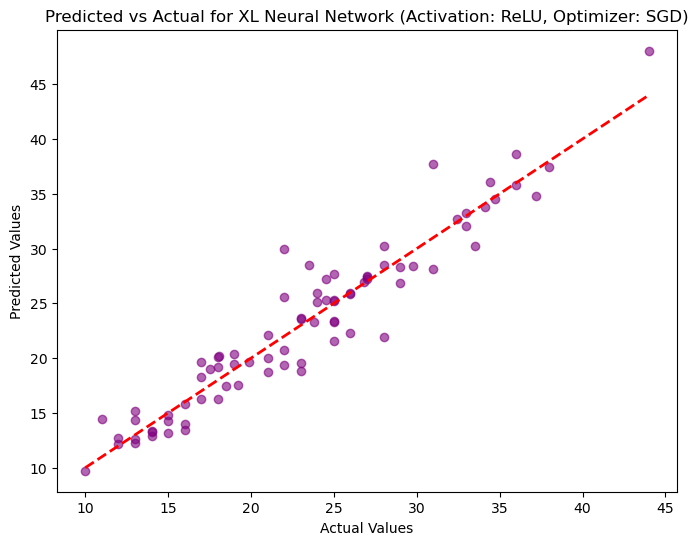

In [12]:
import matplotlib.pyplot as plt
# Function to plot predicted vs actual values with specified color
def plot_predicted_vs_actual(y_true, y_pred, title, color):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, color=color)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Predicted vs Actual for {title}")
    plt.show()
model_colors = {
    '2-Layer Neural Network': 'blue',
    '3-Layer Neural Network': 'green',
    'XL Neural Network': 'purple'
}
for model_name, performance in best_performance.items():
    # Retrieve the best activation and optimizer configuration
    config = performance['Details']['Activation and Optimizer']   
    # Retrieve y_true and y_pred from the best configuration
    y_true_test = performance['Details']['Metrics']['y_true_test']
    y_pred_test = performance['Details']['Metrics']['y_pred_test']   
    # Plot predicted vs actual with specified color
    plot_predicted_vs_actual(y_true_test, y_pred_test, f"{model_name} ({config})", model_colors[model_name])


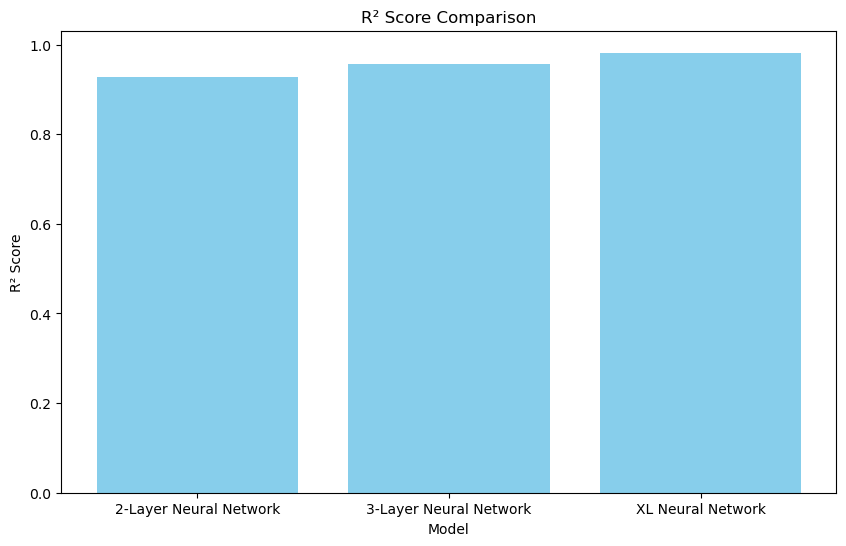

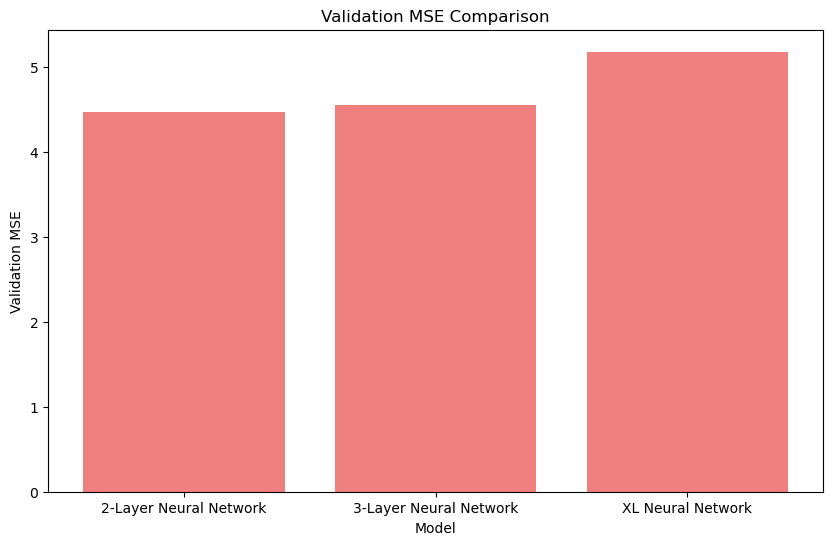

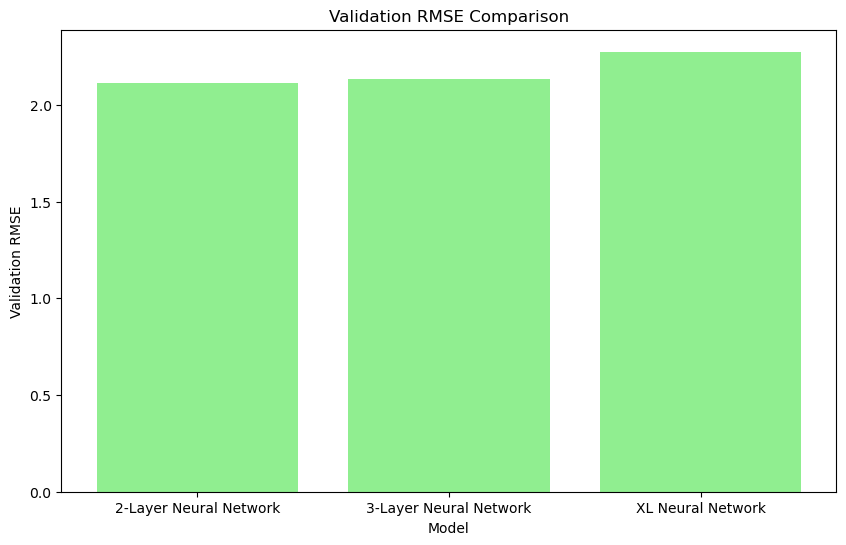

In [13]:
def plot_performance_metrics(best_performance):
    # Collect metrics for plotting
    models = list(best_performance.keys())
    r2_scores = [best_performance[model]['R²'] for model in models]
    mse_scores = [best_performance[model]['Details']['Metrics']['Validation MSE'] for model in models]
    rmse_scores = [best_performance[model]['Details']['Metrics']['Validation RMSE'] for model in models]
    # Plot R² Scores
    plt.figure(figsize=(10, 6))
    plt.bar(models, r2_scores, color='skyblue')
    plt.xlabel("Model")
    plt.ylabel("R² Score")
    plt.title("R² Score Comparison")
    plt.show()
    # Plot MSE Scores
    plt.figure(figsize=(10, 6))
    plt.bar(models, mse_scores, color='lightcoral')
    plt.xlabel("Model")
    plt.ylabel("Validation MSE")
    plt.title("Validation MSE Comparison")
    plt.show()
    # Plot RMSE Scores
    plt.figure(figsize=(10, 6))
    plt.bar(models, rmse_scores, color='lightgreen')
    plt.xlabel("Model")
    plt.ylabel("Validation RMSE")
    plt.title("Validation RMSE Comparison")
    plt.show()
plot_performance_metrics(best_performance)


In [21]:
import torch
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf_model.fit(X_train.numpy(), y_train.numpy().ravel())
# Make predictions on the test set
rf_predictions = rf_model.predict(X_test.numpy())
# Evaluate the model
rf_mse = mean_squared_error(y_test.numpy(), rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test.numpy(), rf_predictions)
print(f'Random Forest Test MSE : {rf_mse:.4f}')
print(f'Random Forest Test RMSE: {rf_rmse:.4f}')
print(f'Random Forest Test R²   : {rf_r2:.4f}')


Random Forest Test MSE : 4.5168
Random Forest Test RMSE: 2.1253
Random Forest Test R²   : 0.9160


In [15]:
from sklearn.model_selection import GridSearchCV
# Example for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)
rf_grid.fit(X_train.numpy(), y_train.numpy().ravel())
print(f'Best Parameters: {rf_grid.best_params_}')
print(f'Best CV MSE: {rf_grid.best_score_:.4f}')
# Evaluate on Test Set
best_rf = rf_grid.best_estimator_
rf_test_predictions = best_rf.predict(X_test.numpy())
rf_test_mse = mean_squared_error(y_test.numpy(), rf_test_predictions)
rf_r2 = r2_score(y_test.numpy(), rf_test_predictions)
print(f'Best Random Forest Test MSE: {rf_test_mse:.4f}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END m

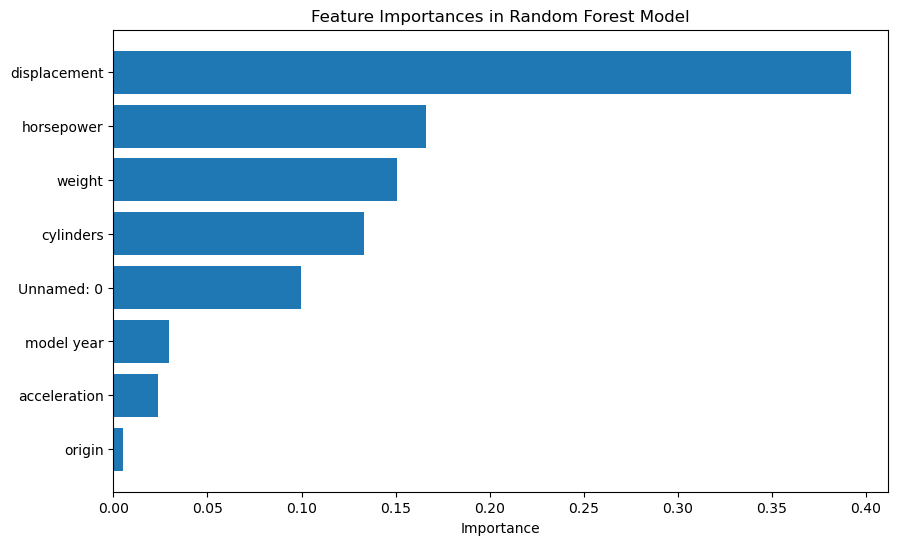

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
# Extract feature importances from the best Random Forest model
feature_importances = best_rf.feature_importances_
feature_names = X.columns 
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances in Random Forest Model')
plt.gca().invert_yaxis() 
plt.show()


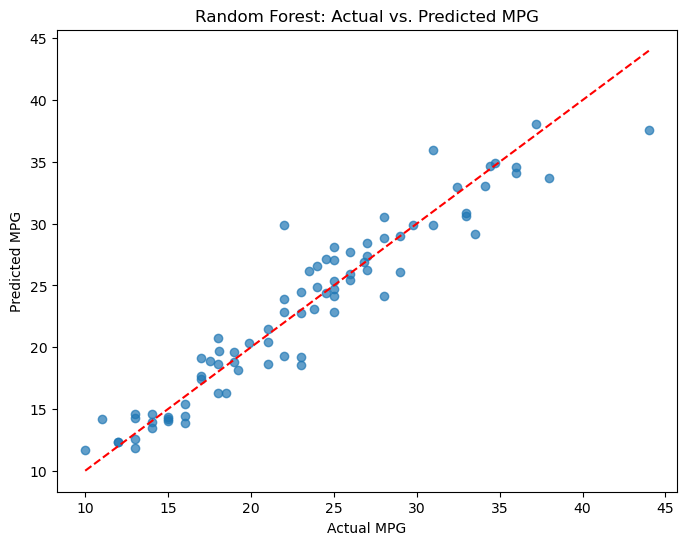

In [17]:
# Scatter plot for Random Forest predictions
plt.figure(figsize=(8,6))
plt.scatter(y_test.numpy(), rf_test_predictions, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Random Forest: Actual vs. Predicted MPG')
plt.show()


In [65]:
from sklearn.model_selection import cross_val_score
cv_r2_scores = cross_val_score(best_rf, X_train.numpy(), y_train.numpy().ravel(), cv=5, scoring='r2')
print(f'\nCross-Validated R² Scores: {cv_r2_scores}')
print(f'Average Cross-Validated R² Score: {cv_r2_scores.mean():.4f}')



Cross-Validated R² Scores: [0.89809161 0.86080208 0.84204864 0.77571794 0.88691443]
Average Cross-Validated R² Score: 0.8527
